# Get both monthly means incl. variation, then plot against in-situ Chlorophyll

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
MODIS = pd.read_csv("../DATA/MODISaqua_monthly.csv", sep=",")

In [4]:
MODIS['date_string'] = MODIS.year.astype(str) + "-" + \
                MODIS.month.astype(str) + "-" + MODIS.day.astype(str)

In [5]:
MODIS['date'] = pd.to_datetime(MODIS['date_string'])

In [6]:
MODIS_2 = MODIS.set_index('date')

In [7]:
MODIS_monthly_mean = MODIS_2.resample('M').mean()
MODIS_monthly_median = MODIS_2.resample('M').median()

MODIS_monthly_std = MODIS_2.resample('M').std()

In [8]:
MODIS_monthly_mean

,year,month,day,lon,lat,value
date,,,,,,
2002-08-31,2002.0,8.0,19.0,-64.683499,10.6875,0.257060
2002-09-30,2002.0,9.0,16.0,-64.683499,10.6875,0.221823
2002-10-31,2002.0,10.0,16.0,-64.683499,10.6875,0.308338
2002-11-30,2002.0,11.0,16.0,-64.683499,10.6875,0.554162
2002-12-31,2002.0,12.0,16.0,-64.683499,10.6875,1.339490
...,...,...,...,...,...,...
2021-07-31,2021.0,7.0,16.0,-64.683499,10.6875,0.512693
2021-08-31,2021.0,8.0,16.0,-64.683499,10.6875,0.281842
2021-09-30,2021.0,9.0,16.0,-64.683499,10.6875,0.224667


# Now Read SeaWiFS

In [9]:
SeaWiFS = pd.read_csv("../DATA/SeaWiFS_monthly.csv", sep=",")

In [10]:
SeaWiFS['date_string'] = SeaWiFS.year.astype(str) + "-" + \
                SeaWiFS.month.astype(str) + "-" + SeaWiFS.day.astype(str)

In [11]:
SeaWiFS['date'] = pd.to_datetime(SeaWiFS['date_string'])

In [12]:
SeaWiFS_2 = SeaWiFS.set_index('date')

In [13]:
SeaWiFS_monthly_mean = SeaWiFS_2.resample('M').mean()
SeaWiFS_monthly_median = SeaWiFS_2.resample('M').median()

SeaWiFS_monthly_std = SeaWiFS_2.resample('M').std()

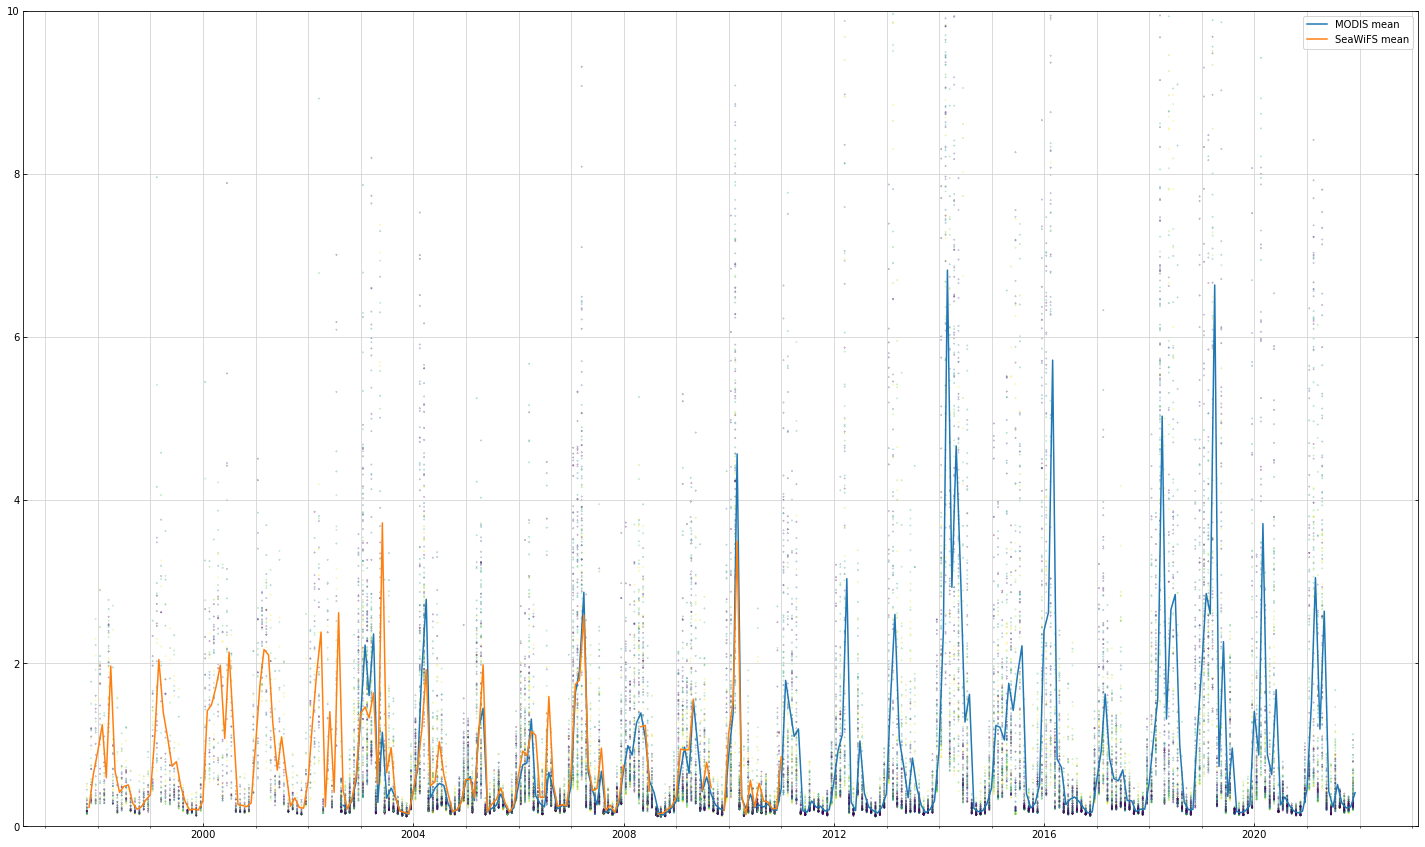

In [14]:
plt.rcParams['figure.figsize'] = [25, 15]

import matplotlib.dates as mdates

plt.axes().xaxis.set_minor_locator(mdates.YearLocator())

plt.grid(True,which='both', color='lightgrey')
plt.tick_params(top=False, right=True, direction="in")

plt.plot(MODIS_monthly_mean.index, MODIS_monthly_mean['value'], label='MODIS mean')
#plt.plot(DATA_monthly_median.index, DATA_monthly_median['value'], label='MODIS median')
plt.scatter(MODIS['date'], MODIS['value'], marker='x', c=MODIS['lat'], s=1, alpha=0.3)

plt.plot(SeaWiFS_monthly_mean.index, SeaWiFS_monthly_mean['value'], label='SeaWiFS mean')
#plt.plot(SeaWiFS_monthly_median.index, SeaWiFS_monthly_median['value'], label='SeaWiFS median')
plt.scatter(SeaWiFS['date'], SeaWiFS['value'], marker='x', c=SeaWiFS['lat'], s=1, alpha=0.3)

plt.ylim(0,10)
plt.legend()
#plt.savefig("QuickSatViz.png")

# Plot individual time series against in-situ Chlorophyll!

### prelim plot MODIS

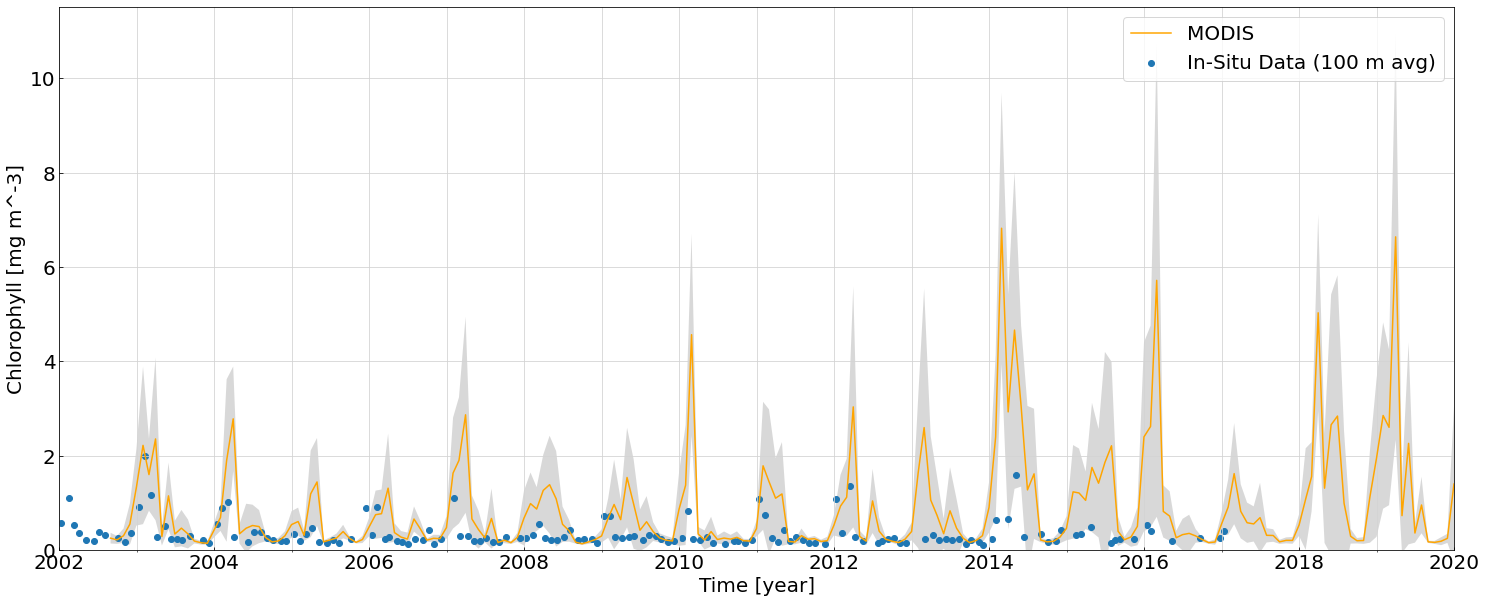

In [56]:
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['figure.figsize'] = [25, 10]
matplotlib.rcParams.update({'font.size': 20})

fig, ax = plt.subplots()

ax.plot(MODIS_monthly_mean.index, MODIS_monthly_mean['value'], color="orange", label='MODIS')
ax.fill_between(MODIS_monthly_mean.index, 
                    MODIS_monthly_mean['value']-MODIS_monthly_std['value'], 
                    MODIS_monthly_mean['value']+MODIS_monthly_std['value'], alpha=0.3, facecolor="grey")

ax.xaxis.set_minor_locator(mdates.YearLocator())
ax.grid(True,which='both', color='lightgrey')
ax.tick_params(top=False,  direction="in")

ax.set_ylabel("Chlorophyll [mg m^-3]")
ax.set_xlabel("Time [year]")
ax.set_ylim(bottom=0)
ax.set_xlim(pd.to_datetime("2002"),pd.to_datetime("2020"))
    
ax.scatter(NISKIN_date['date'], NISKIN_date['Chlorophyll'], label='In-Situ Data (100 m avg)')
ax.legend()

plt.savefig("MODISvsInSitu.pdf")

### prelim plot SeaWiFS

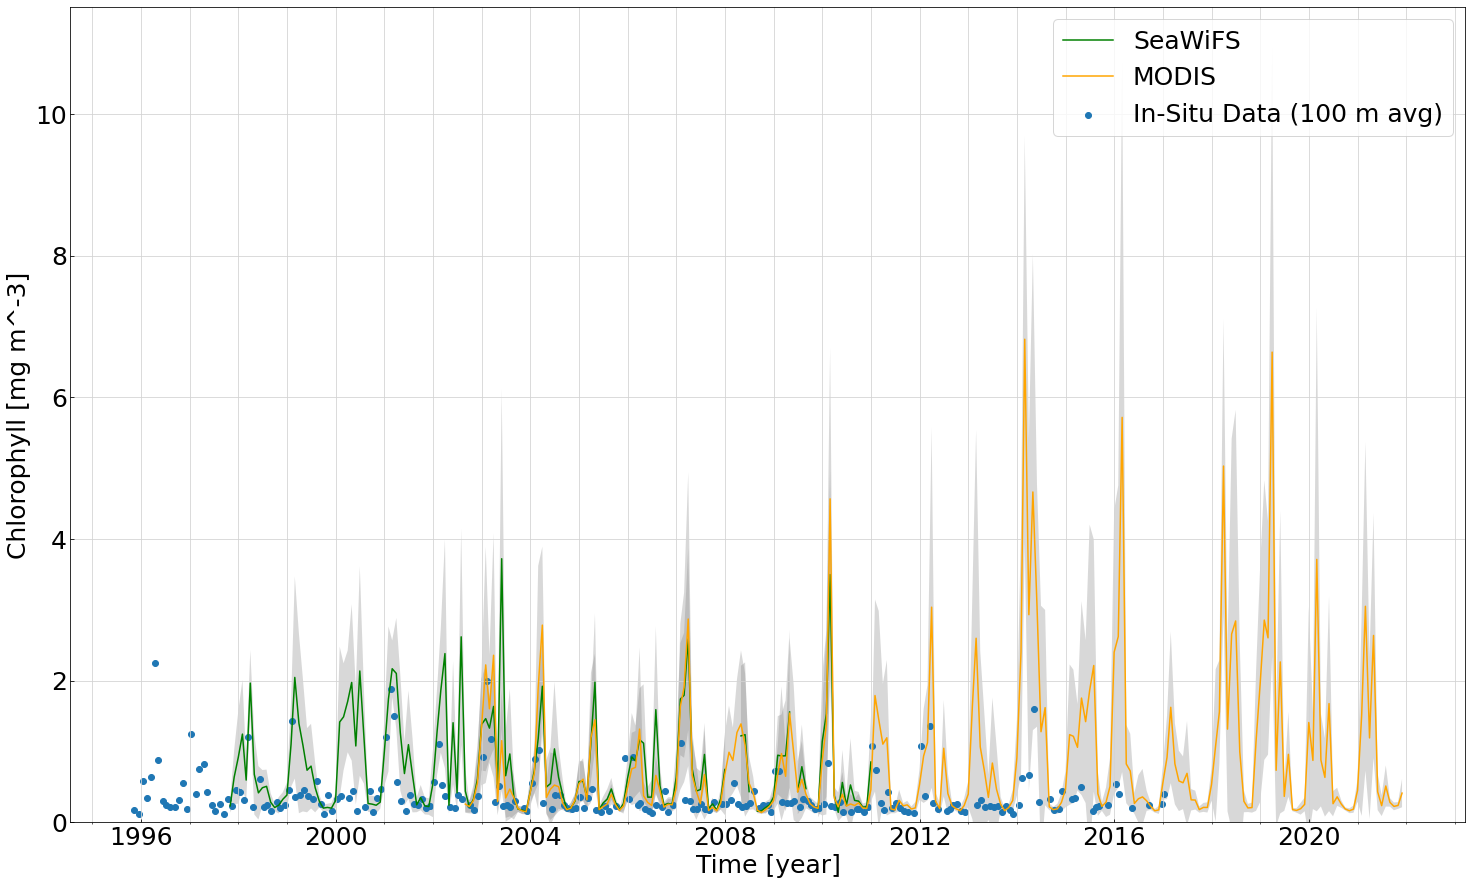

In [105]:

plt.rcParams['figure.figsize'] = [25, 15]
matplotlib.rcParams.update({'font.size': 25})

fig, ax = plt.subplots()

ax.plot(SeaWiFS_monthly_mean.index, SeaWiFS_monthly_mean['value'], color="green", label='SeaWiFS')
ax.fill_between(SeaWiFS_monthly_mean.index, 
                    SeaWiFS_monthly_mean['value']-SeaWiFS_monthly_std['value'], 
                    SeaWiFS_monthly_mean['value']+SeaWiFS_monthly_std['value'], alpha=0.3, facecolor="grey")

ax.plot(MODIS_monthly_mean.index, MODIS_monthly_mean['value'], color="orange", label='MODIS')
ax.fill_between(MODIS_monthly_mean.index, 
                    MODIS_monthly_mean['value']-MODIS_monthly_std['value'], 
                    MODIS_monthly_mean['value']+MODIS_monthly_std['value'], alpha=0.3, facecolor="grey")


ax.xaxis.set_minor_locator(mdates.YearLocator())
ax.grid(True,which='both', color='lightgrey')
ax.tick_params(top=False,  direction="in")

ax.set_ylabel("Chlorophyll [mg m^-3]")
ax.set_xlabel("Time [year]")
ax.set_ylim(bottom=0)
    
ax.scatter(NISKIN_date['date'], NISKIN_date['Chlorophyll'], label='In-Situ Data (100 m avg)')
ax.legend()


#plt.savefig("SatelliteChlvsInSitu.png")

## read Chlorophyll DATA

- get chlorophyll data with proper date (day of cruise!)
- get daily chlorophyll data

In [15]:
import xarray as xr

CARIACO = xr.open_dataset("../../annotatedDATA/CARIACO_merged_02.nc")

In [16]:
CARIACO

<xarray.Dataset>
Dimensions:                       (time: 256)
Coordinates:
  * time                          (time) datetime64[ns] 1995-11-01 ... 2017-0...
Data variables:
    time_month                    (time) object ...
    cdww                          (time) float64 ...
    iews                          (time) float64 ...
    inss                          (time) float64 ...
    mcc                           (time) float64 ...
    mwp                           (time) float64 ...
    si10                          (time) float64 ...
    sp                            (time) float64 ...
    sst                           (time) float64 ...
    t2m                           (time) float64 ...
    tauoc                         (time) float64 ...
    u10                           (time) float64 ...
    ust                           (time) float64 ...
    v10                           (time) float64 ...
    v10n                          (time) float64 ...
    vst                           (time) float64 ...
    wind                          (time) float64 ...
    cdir                          (time) int32 ...
    e                             (time) float64 ...
    ewss                          (time) float64 ...
    i10fg                         (time) float64 ...
    lsp                           (time) float64 ...
    magss                         (time) float64 ...
    mer                           (time) float64 ...
    metss                         (time) float64 ...
    mmtss                         (time) float64 ...
    mntss                         (time) float64 ...
    mtpr                          (time) float64 ...
    nsss                          (time) float64 ...
    sshf                          (time) int32 ...
    tp                            (time) float64 ...
    O2_ml_L                       (time) float64 ...
    O2_umol_kg                    (time) float64 ...
    NO3_UDO                       (time) float64 ...
    PO4_UDO                       (time) float64 ...
    SiO4_UDO                      (time) float64 ...
    NH4_USF                       (time) float64 ...
    NO2_USF                       (time) float64 ...
    NO3_NO2_USF                   (time) float64 ...
    PO4_USF                       (time) float64 ...
    SiO4_USF                      (time) float64 ...
    pH                            (time) float64 ...
    Alkalinity_mol_kg             (time) float64 ...
    Alkalinity_umol_kg            (time) float64 ...
    TCO2                          (time) float64 ...
    fCO2                          (time) float64 ...
    pH_corrected                  (time) float64 ...
    TCO2_corrected                (time) float64 ...
    fCO2_corrected                (time) float64 ...
    Salinity_bottles              (time) float64 ...
    Salinity_CTD                  (time) float64 ...
    Temperature                   (time) float64 ...
    Sigma_t                       (time) float64 ...
    TPP                           (time) float64 ...
    PIP                           (time) float64 ...
    POC_ug_kg                     (time) float64 ...
    PON_ug_kg                     (time) float64 ...
    POC_ug_L                      (time) float64 ...
    PN_ug_L                       (time) float64 ...
    C_N_particulate               (time) float64 ...
    DON                           (time) float64 ...
    DOP                           (time) float64 ...
    DOC                           (time) float64 ...
    TOC                           (time) float64 ...
    PrimaryProductivity           (time) float64 ...
    Chlorophyll                   (time) float64 ...
    Phaeopigments                 (time) float64 ...
    Total_Prokaryotes             (time) float64 ...
    Bact_Biomass_mgC_m3           (time) float64 ...
    Bact_Biomass_uMC              (time) float64 ...
    NO3_USF                       (time) float64 ...
    NO3_merged                    (time) float64 ...
    PO4_merged  

In [17]:
NISKIN_date = pd.read_csv("../../DATA/Niskin_mergedNutrients_wDATE.csv", sep=",")

NISKIN_date['date'] = pd.to_datetime(NISKIN_date['date'])

In [18]:
NISKIN_date['date']

0     1995-11-08
1     1995-12-13
2     1996-01-12
3     1996-02-13
4     1996-03-13
         ...    
222   2016-02-04
223   2016-05-11
224   2016-09-20
225   2016-12-21
226   2017-01-12
Name: date, Length: 227, dtype: datetime64[ns]

# CONCAT try

In [113]:
SatelliteMEANconcat = pd.concat([SeaWiFS_monthly_mean, MODIS_monthly_mean]).resample('M').mean()

<AxesSubplot:xlabel='date'>

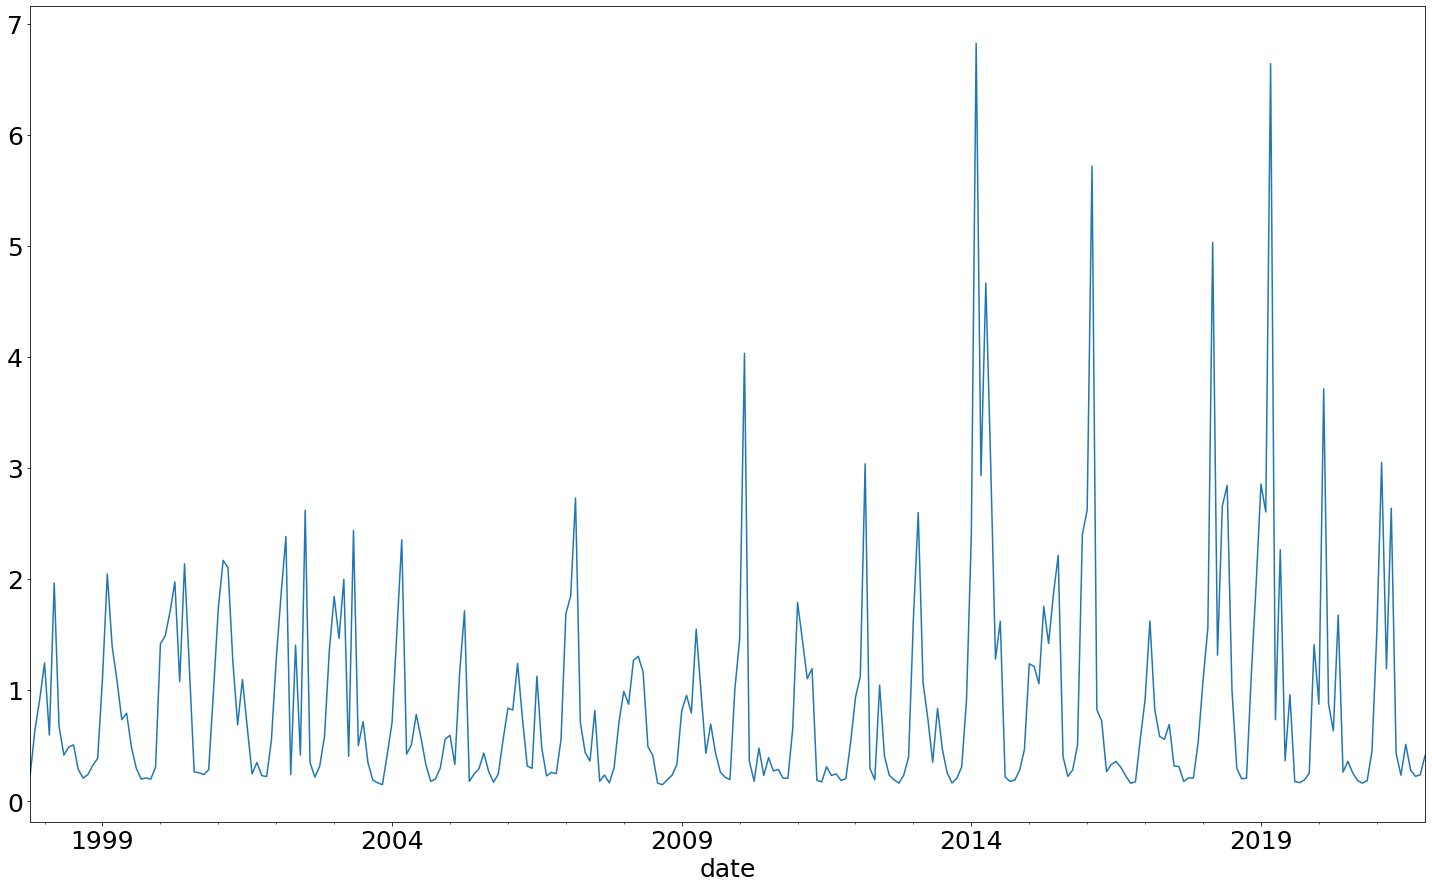

In [114]:
SatelliteMEANconcat.value.plot()

In [115]:
SatelliteMEANconcat.value

date
1997-10-31    0.231117
1997-11-30    0.638016
1997-12-31    0.918222
1998-01-31    1.245373
1998-02-28    0.596021
                ...   
2021-07-31    0.512693
2021-08-31    0.281842
2021-09-30    0.224667
2021-10-31    0.237703
2021-11-30    0.412240
Freq: M, Name: value, Length: 290, dtype: float64

# merge datasets and export to merge with other data for analysis

In [98]:
SeaWiFS_monthly_mean.to_csv("SeaWiFS_monthly_mean.csv")

In [99]:
MODIS_monthly_mean.to_csv("MODIS_monthly_mean.csv")

In [112]:
SatelliteMEANconcat.to_csv("SatelliteCONCAT_monthly_mean.csv")

In [96]:
SeaWiFS.to_xarray()

<xarray.Dataset>
Dimensions:      (index: 6080)
Coordinates:
  * index        (index) int64 0 1 2 3 4 5 6 ... 6074 6075 6076 6077 6078 6079
Data variables:
    year         (index) int64 1997 1997 1997 1997 1997 ... 2010 2010 2010 2010
    month        (index) int64 10 10 10 10 10 10 10 10 ... 12 12 12 12 12 12 12
    day          (index) int64 16 16 16 16 16 16 16 16 16 ... 5 5 5 5 5 5 5 5 5
    lon          (index) float64 -64.96 -64.88 -64.8 ... -64.56 -64.49 -64.41
    lat          (index) float64 10.84 10.84 10.84 10.84 ... 10.53 10.53 10.53
    value        (index) float64 0.1483 0.1461 0.1558 ... 2.504 1.714 1.106
    unit         (index) object 'mg m^-3' 'mg m^-3' ... 'mg m^-3' 'mg m^-3'
    var          (index) object 'chlor_a' 'chlor_a' ... 'chlor_a' 'chlor_a'
    date_string  (index) object '1997-10-16' '1997-10-16' ... '2010-12-5'
    date         (index) datetime64[ns] 1997-10-16 1997-10-16 ... 2010-12-05

In [77]:
SeaWiFS_grouped = SeaWiFS.groupby(['date', 'lat', 'lon'])['value'].mean()

In [95]:
# create an empty array of NaN of the right dimensions
SeaWiFS_shape = tuple(map(len, SeaWiFS_grouped.index.levels))
SeaWiFS_arr = np.full(SeaWiFS_shape, np.nan)

# fill it using Numpy's advanced indexing
SeaWiFS_arr[SeaWiFS_grouped.index] = SeaWiFS_grouped.values.flat

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [94]:
SeaWiFS_grouped.index

MultiIndex([('1997-10-16', 10.531099319458, -64.9604339599609),
            ('1997-10-16', 10.531099319458, -64.8813095092773),
            ('1997-10-16', 10.531099319458, -64.8021850585938),
            ('1997-10-16', 10.531099319458, -64.7230606079102),
            ('1997-10-16', 10.531099319458, -64.6439361572266),
            ('1997-10-16', 10.531099319458,  -64.564811706543),
            ('1997-10-16', 10.531099319458, -64.4856872558594),
            ('1997-10-16', 10.531099319458, -64.4065628051758),
            ('1997-10-16', 10.609299659729, -64.9604339599609),
            ('1997-10-16', 10.609299659729, -64.8813095092773),
            ...
            ('2010-12-05', 10.765700340271, -64.4856872558594),
            ('2010-12-05', 10.765700340271, -64.4065628051758),
            ('2010-12-05', 10.843900680542, -64.9604339599609),
            ('2010-12-05', 10.843900680542, -64.8813095092773),
            ('2010-12-05', 10.843900680542, -64.8021850585938),
            ('2010-12-05

In [73]:
SeaWiFS_grouped.loc('date'==pd.to_datetime("1997-10-16"))

AttributeError: '_LocIndexer' object has no attribute 'values'

TypeError: Invalid shape (6080,) for image data

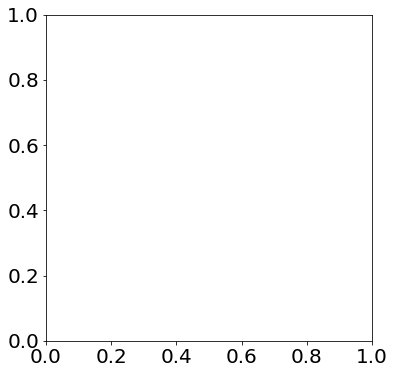

In [68]:
fig = plt.figure(figsize=(12,6))
im = plt.imshow(SeaWiFS_grouped)